# Investigating the choices of output height

Will changing the output height change anything in terms of latent or sensible heat flux?

## Load modules

In [1]:
%load_ext autoreload
%autoreload 1

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from AirSeaFluxCode import AirSeaFluxCode as ASFC

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%aimport my_funcs

my_funcs.update_params(fontsize=24)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Paired.colors)

## Load the data

To start analysis, we need to load the data, both Sailbuoys, the ship, and reanalysis.

In [25]:
ds = xr.open_dataset('../../Validating_Sailbuoy/data/ship_met_quicche_10min_corrected_wind_binned.nc') # R/V Revelle, 10 minute
ds1 = xr.open_dataset('../../Validating_Sailbuoy/data/ship_met_quicche_1s_corrected.nc') # R/V Revelle, 10 minute

In [3]:
# Convert Sailbuoy data into NumPy arrays
lat = np.asarray(ds["LA"])        # Latitude
spd = np.asarray(ds["TW"])      # Wind speed
t = np.asarray(ds["RT"])             # Air temperature
sst = np.asarray(ds["TT"])              # Sea surface temperature
rh = np.asarray(ds["RH"])                # Relative humidity
Rl = np.asarray(ds["LW"])
Rs = np.asarray(ds["SW"])

# Initialize a constant
hin = 17

In [70]:
bulk_as_skin_wl_0 = ASFC(spd, t, sst, 'skin', meth='C35', lat=lat, hin=hin, hout=10, hum=["rh", rh], Rl=Rl, Rs=Rs, cskin=0, wl=0, out_var=['sensible', 'latent'])
bulk_as_skin_wl_1 = ASFC(spd, t, sst, 'skin', meth='C35', lat=lat, hin=hin, hout=10, hum=["rh", rh], Rl=Rl, Rs=Rs, cskin=0, wl=1, out_var=['sensible', 'latent'])
bulk_cskin_1_wl_0 = ASFC(spd, t, sst, 'bulk', meth='C35', lat=lat, hin=hin, hout=10, hum=["rh", rh], Rl=Rl, Rs=Rs, cskin=1, wl=0, out_var=['sensible', 'latent'])
bulk_cskin_1_wl_1 = ASFC(spd, t, sst, 'bulk', meth='C35', lat=lat, hin=hin, hout=10, hum=["rh", rh], Rl=Rl, Rs=Rs, cskin=1, wl=1, out_var=['sensible', 'latent'])


In [71]:
bulk_as_skin_wl_0['latent'][~(bulk_as_skin_wl_0['latent'] < 500)] = np.nan
bulk_as_skin_wl_0['latent'][~(bulk_as_skin_wl_0['latent'] > -1000)] = np.nan

bulk_as_skin_wl_1['latent'][~(bulk_as_skin_wl_1['latent'] < 500)] = np.nan
bulk_as_skin_wl_1['latent'][~(bulk_as_skin_wl_1['latent'] > -1000)] = np.nan

bulk_cskin_1_wl_0['latent'][~(bulk_cskin_1_wl_0['latent'] < 500)] = np.nan
bulk_cskin_1_wl_0['latent'][~(bulk_cskin_1_wl_0['latent'] > -1000)] = np.nan

bulk_cskin_1_wl_1['latent'][~(bulk_cskin_1_wl_1['latent'] < 500)] = np.nan
bulk_cskin_1_wl_1['latent'][~(bulk_cskin_1_wl_1['latent'] > -1000)] = np.nan

bulk_as_skin_wl_0['sensible'][~(bulk_as_skin_wl_0['sensible'] < 500)] = np.nan
bulk_as_skin_wl_0['sensible'][~(bulk_as_skin_wl_0['sensible'] > -1000)] = np.nan

bulk_as_skin_wl_1['sensible'][~(bulk_as_skin_wl_1['sensible'] < 500)] = np.nan
bulk_as_skin_wl_1['sensible'][~(bulk_as_skin_wl_1['sensible'] > -1000)] = np.nan

bulk_cskin_1_wl_0['sensible'][~(bulk_cskin_1_wl_0['sensible'] < 500)] = np.nan
bulk_cskin_1_wl_0['sensible'][~(bulk_cskin_1_wl_0['sensible'] > -1000)] = np.nan

bulk_cskin_1_wl_1['sensible'][~(bulk_cskin_1_wl_1['sensible'] < 500)] = np.nan
bulk_cskin_1_wl_1['sensible'][~(bulk_cskin_1_wl_1['sensible'] > -1000)] = np.nan

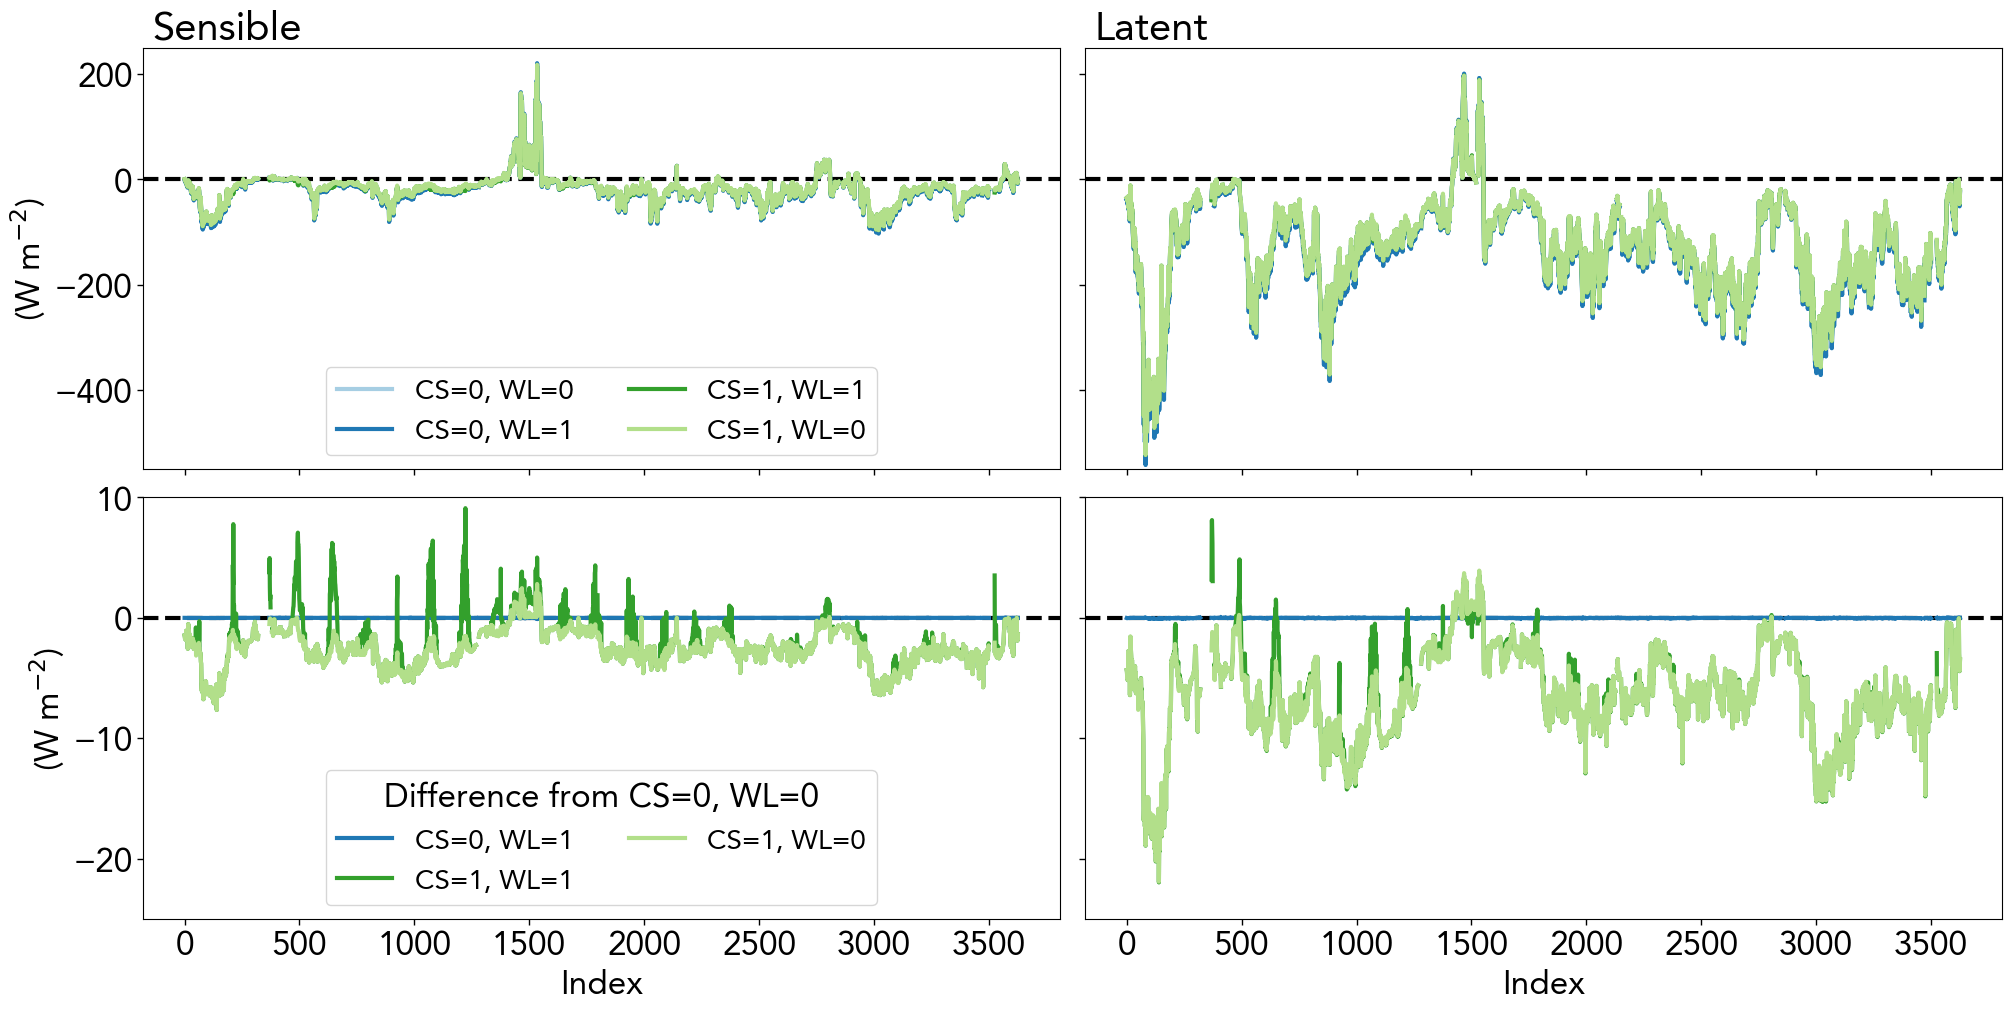

In [98]:
# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(20, 10), constrained_layout=True, sharex=True, sharey='row')

# Iterate over methods and subplots
for axs,var in zip(ax.flatten()[:2],['sensible','latent']):
    for meth, ds, c in zip(['CS=0, WL=0','CS=0, WL=1','CS=1, WL=1','CS=1, WL=0'], [bulk_as_skin_wl_0,bulk_as_skin_wl_1,bulk_cskin_1_wl_1,bulk_cskin_1_wl_0],['C0','C1','C3','C2']):
        ds[var].plot(ax=axs,c=c, lw=3, label=meth, zorder=2)

    axs.axhline(0,ls='--',c='k',lw=3, zorder=1)
    # Set labels and title for each subplot
    axs.set(xlabel='', ylabel=r"(W m$^{-2}$)", ylim=(-550,250))
    axs.set_title(f"{var.capitalize()}", loc='left', x=0.01, y=1)


# Iterate over methods and subplots
for axs,var in zip(ax.flatten()[2:],['sensible','latent']):
    for meth, ds, c in zip(['CS=0, WL=1','CS=1, WL=1','CS=1, WL=0'], [bulk_as_skin_wl_1,bulk_cskin_1_wl_1,bulk_cskin_1_wl_0],['C1','C3','C2']):
        (bulk_as_skin_wl_0[var] - ds[var]).plot(ax=axs,c=c, lw=3, label=f"{meth}", zorder=2)

    axs.axhline(0,ls='--',c='k',lw=3, zorder=1)
    # Set labels and title for each subplot
    axs.set(xlabel='Index', ylabel=r"(W m$^{-2}$)", ylim=(-25,10))

# Add legend to the first subplot
ax.flatten()[0].legend(loc='lower center', ncol=2, fontsize='small')
# Add legend to the first subplot
ax.flatten()[2].legend(loc='lower center', ncol=2, fontsize='small',title="Difference from CS=0, WL=0")


# Show the plot
plt.show()

# Save the figure
fig.savefig("bulk_vs_skin_analysis.png")

# Compare ERA5 SW/LW with ship

In [3]:
era5 = xr.open_dataset('../../Validating_Sailbuoy/data/ERA5_ship.nc')

In [4]:
era5_10min = era5.interp_like(ds)

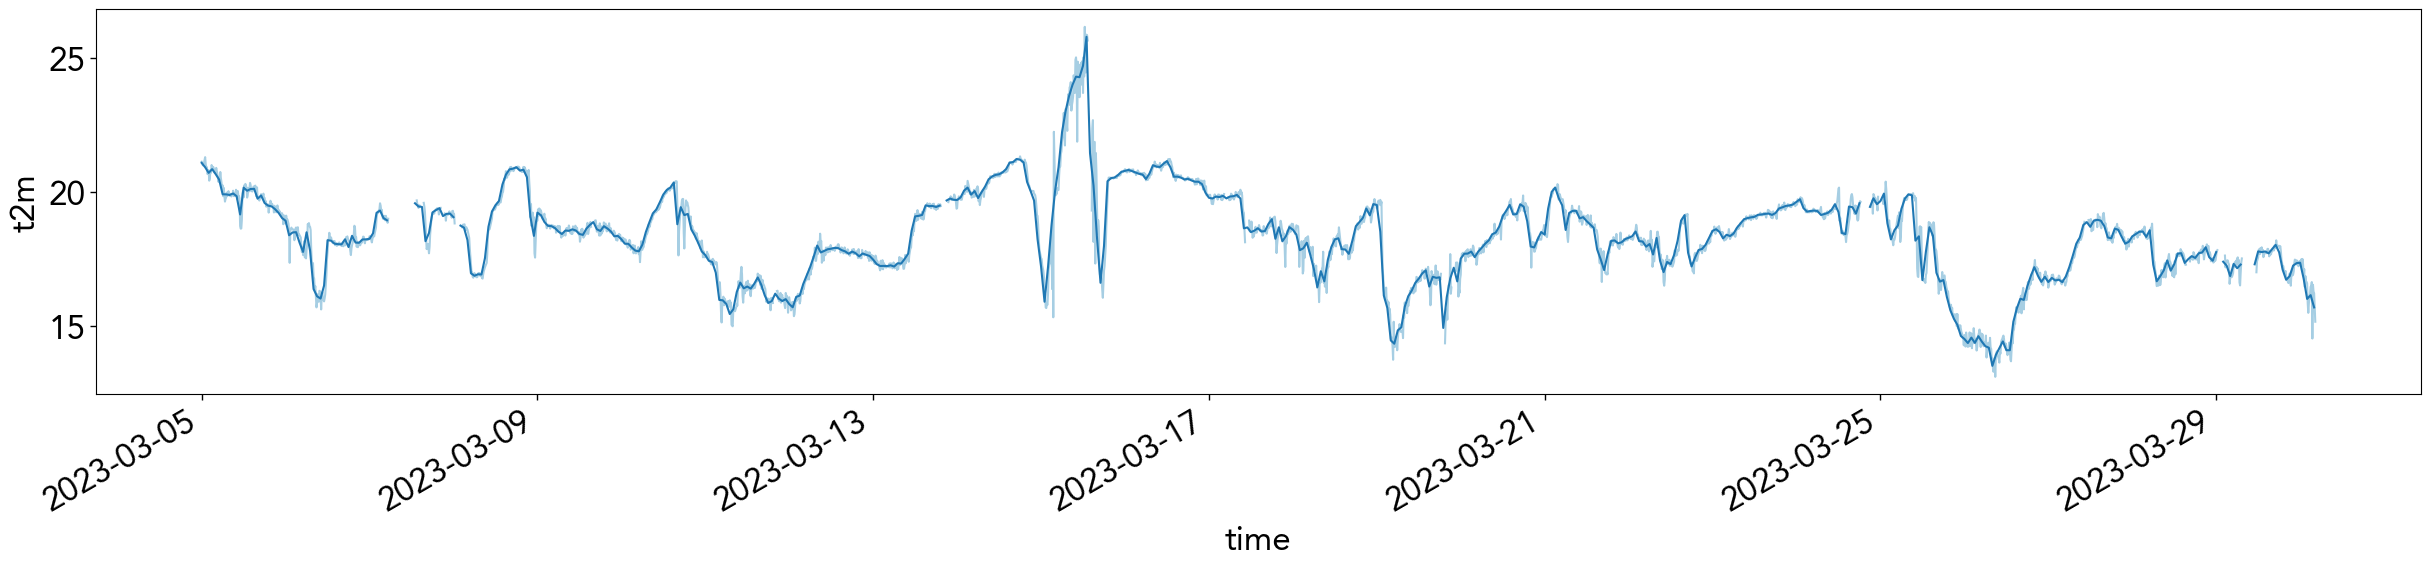

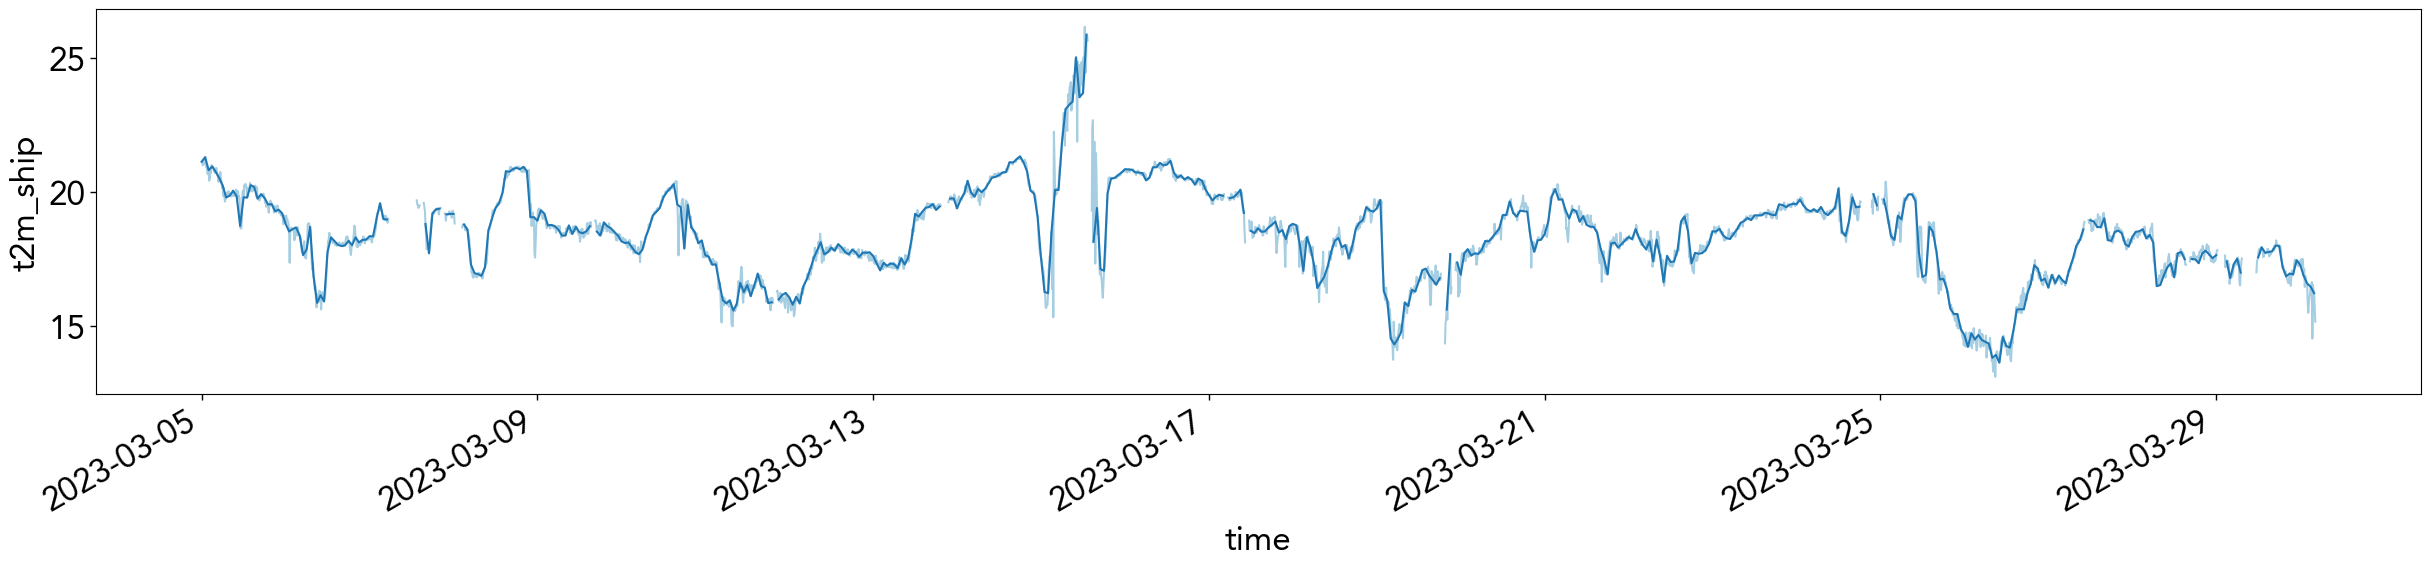

In [20]:
ds['t2m'].plot(figsize=(30,5))
ds['t2m'].resample(time='1H').mean('time').plot()

ds['t2m'].plot(figsize=(30,5))
era5_10min['t2m_ship'].plot()
#era5['t2m_ship'].plot()


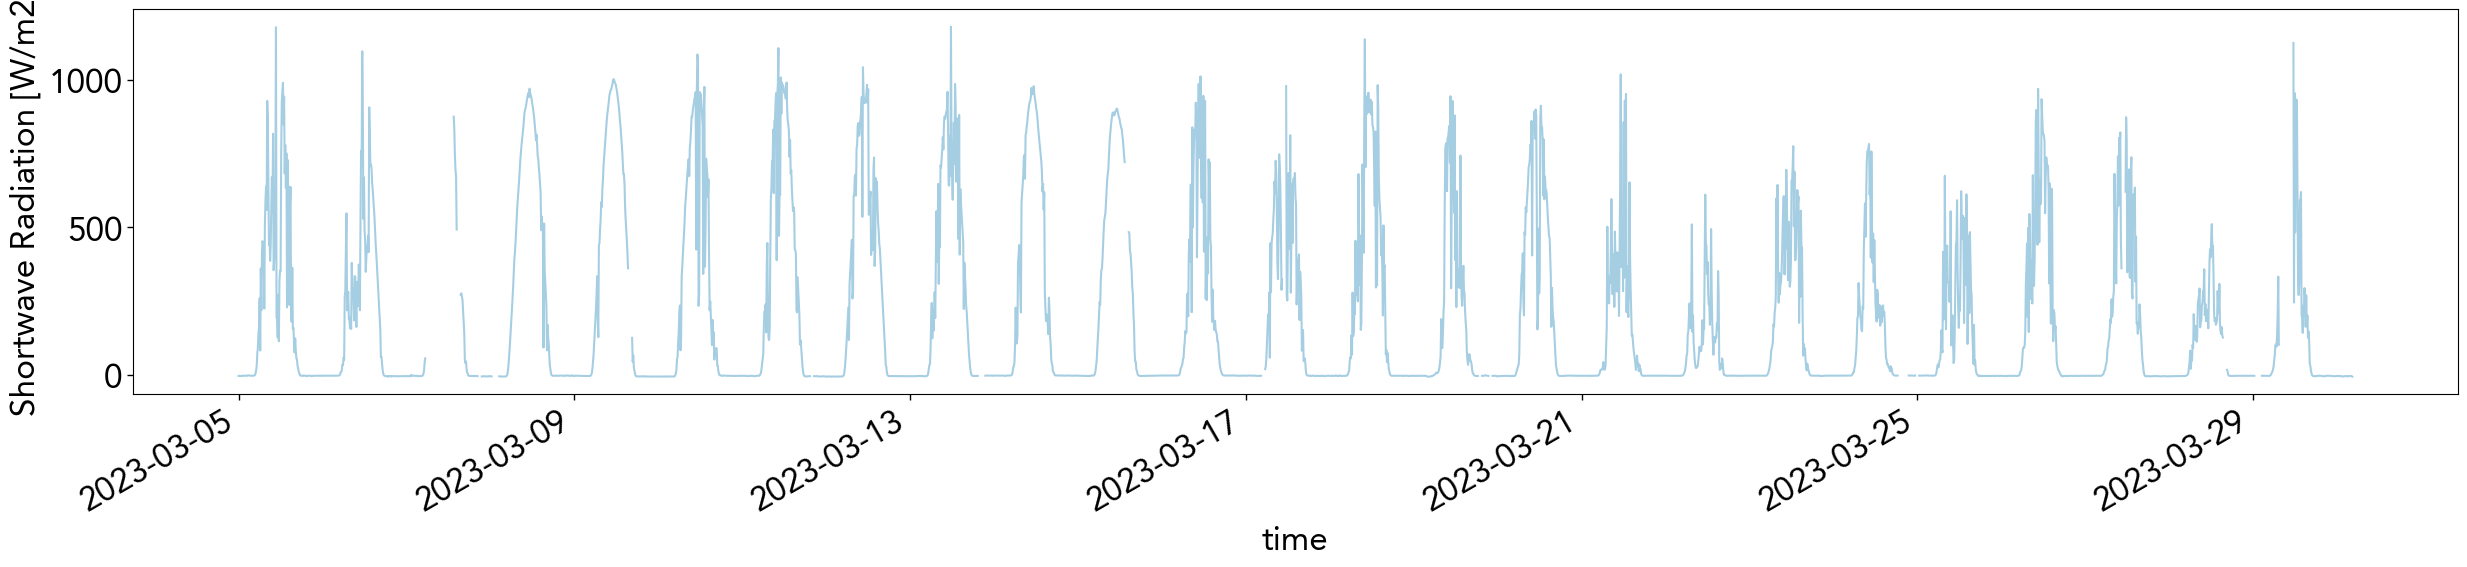

In [22]:
ds['SW'].plot(figsize=(30,5))

In [41]:
def process_era_data(ds, era5):
    """
    Process ds and ERA5 data.

    Parameters:
    - ds (xarray.Dataset): Ship data containing various variables like time, latitude, longitude, etc.
    - era5 (xarray.Dataset): ERA5 data containing meteorological information.

    Returns:
    - ds_1h (xarray.Dataset): Processed ds data with a one-hour time interval.
    """

    # Extract unique hourly times from ds data
    #mt = [time for time in ds.time.values if time in np.unique(ds.time.dt.floor('H').values)]
    #mi = [np.where(ds.time.values == time)[0][0] for time in mt]
    #ds_1h = ds.isel(time=mi)
    ds_1h = ds.reset_coords().resample(time='1H').mean('time')
    t = ds_1h.time.values
    
    # Interpolate and round latitude and longitude to the nearest 0.25 degrees
    lats = (np.round(ds_1h['latitude'].interpolate_na('time') * 4) / 4)
    lons = (np.round(ds_1h['longitude'].interpolate_na('time') * 4) / 4)
    
    # Retrieve ERA5 data for corresponding time, latitude, and longitude
    temp = []
    for i in range(len(t)):
        temp.append(era5.sel(time=t[i]).sel(longitude=lons[i].values).sel(latitude=lats[i].values))
    
    era5_ds = xr.concat(temp, dim='time')
    
    era5_ds['doy'] = ds_1h['doy']
    era5_ds = era5_ds.set_coords('doy')

    return ds_1h, era5_ds

In [6]:
ds = ds.rename({'LA':'latitude','LO':'longitude'})

In [7]:
era5_rad = xr.open_dataset('../../Validating_Sailbuoy/data/QUICCHE_ERA5_radiation.nc')

In [42]:
ship1h, era5ship = process_era_data(ds,era5_rad)

KeyError: 'latitude'

In [27]:
ds1['LW'] = ds1['LW'].where(np.logical_and(ds1['LW'] > 200,ds1['LW'] < 420))

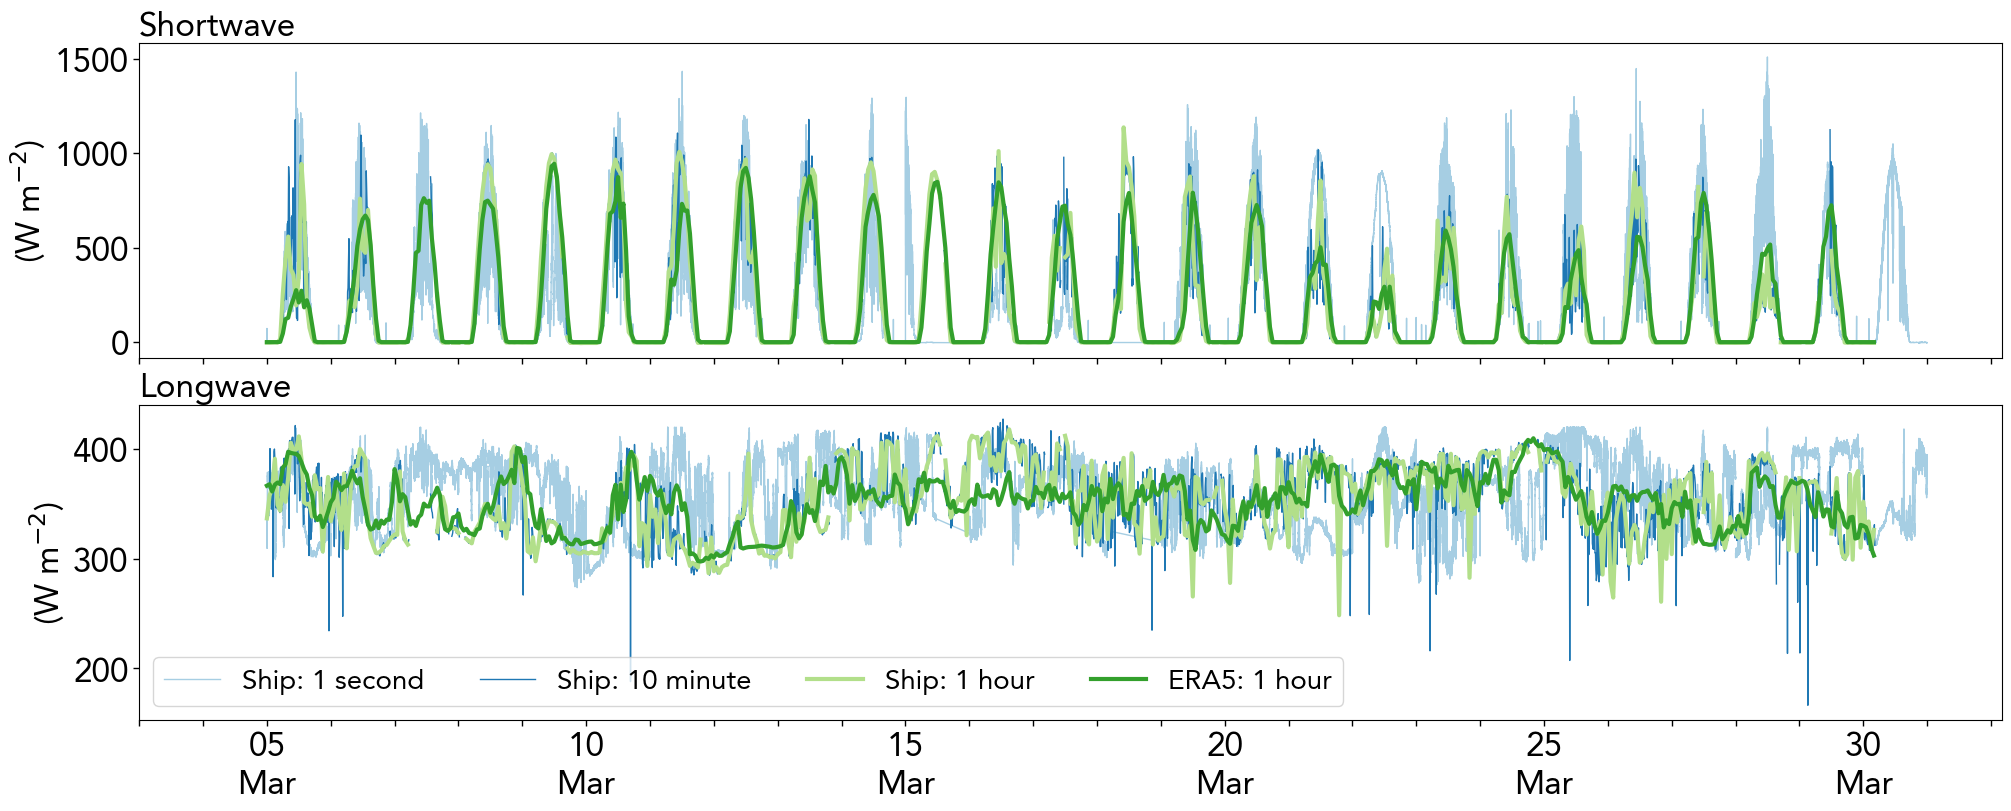

In [38]:
fig,(ax,bx) = plt.subplots(2,1,constrained_layout=True,figsize=(20,8),sharex=True)

ds1['SW'].plot(ax=ax,lw=1)
ds['SW'].plot(ax=ax,lw=1)
ship1h['SW'].plot(ax=ax,lw=3)
(era5ship['ssrd']/3600).plot(ax=ax,lw=3)

ds1['LW'].plot(ax=bx,lw=1, label='Ship: 1 second')
ds['LW'].plot(ax=bx,lw=1, label='Ship: 10 minute')
ship1h['LW'].plot(ax=bx,lw=3, label='Ship: 1 hour')
(era5ship['strd']/3600).plot(ax=bx,lw=3, label='ERA5: 1 hour')
bx.legend(loc='lower left',ncol=4,fontsize='small')

for axs,t in zip([ax,bx],['Shortwave','Longwave']):
    axs.set(xlabel='',ylabel='(W m$^{-2}$)')
    axs.set_title(t,loc='left',fontsize='medium')

my_funcs.fix_xticks([bx],era5ship)